# S03 T01: _Visualització gràfica d'un dataset_

### Descripción: _Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn._

### Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

   + Una variable categòrica (UniqueCarrier)
   + Una variable numèrica (ArrDelay)
   + Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
   + Dues variables numèriques (ArrDelay i DepDelay)
   + Tres variables (ArrDelay, DepDelay i UniqueCarrier)
   + Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

### Exercici 2
Exporta els gràfics com imatges o com html.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
data_base = pd.read_csv('DelayedFlights.csv')
data_base_1 = data_base[['UniqueCarrier','Month', 'DepTime','CRSDepTime','ArrTime','CRSArrTime', 'FlightNum','ActualElapsedTime','CRSElapsedTime', 'AirTime','ArrDelay', 'DepDelay','Origin', 'Dest', 'Distance', 'Cancelled', 'Diverted']].copy()
data_base_1_clean=data_base_1.dropna()

<AxesSubplot:title={'center':'Number of flights from each airline'}, xlabel='UniqueCarrier'>

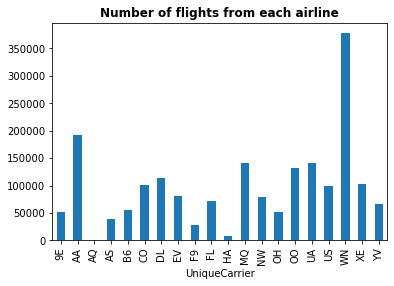

In [2]:
aerolineas = data_base_1.groupby(['UniqueCarrier']).size()
plt.title("Number of flights from each airline", fontweight='bold')
aerolineas.plot.bar() 

<AxesSubplot:title={'center':'Number of flights from each airline'}, ylabel='None'>

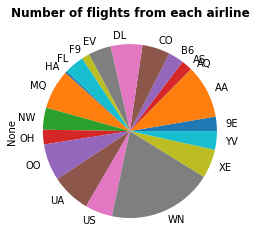

In [3]:
aerolineas = data_base_1.groupby(['UniqueCarrier']).size()
plt.title("Number of flights from each airline", fontweight='bold')
plt.savefig('Airlines.png')
aerolineas.plot.pie() 

<AxesSubplot:ylabel='Frequency'>

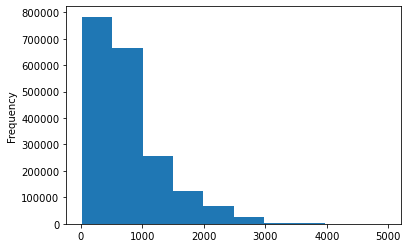

In [4]:
data_base_1_clean["Distance"].plot(kind = 'hist')

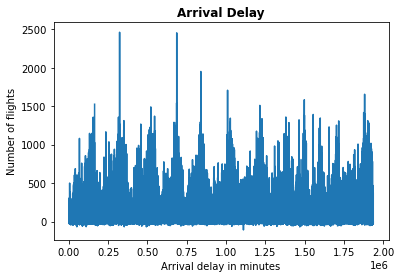

In [5]:
plt.title("Arrival Delay", fontweight='bold')

plt.xlabel("Arrival delay in minutes")
plt.ylabel("Number of flights")

plt.plot(data_base_1[data_base_1.columns[10]]) 


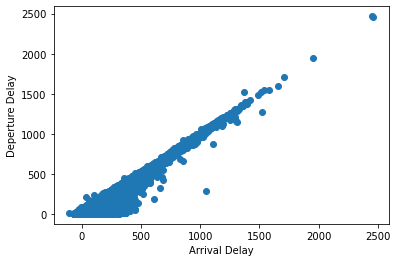

In [6]:
# Dues variables numèriques (ArrDelay i DepDelay)
plt.scatter(data_base_1_clean['ArrDelay'],data_base_1_clean['DepDelay'])

plt.xlabel('Arrival Delay')
plt.ylabel('Deperture Delay')
plt.savefig('ArrDep_Delay.png')
plt.show()


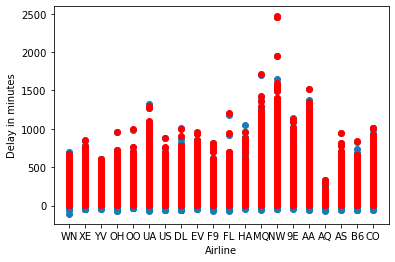

In [7]:
# Tres variables (ArrDelay, DepDelay i UniqueCarrier)
plt.scatter(data_base_1_clean['UniqueCarrier'], data_base_1_clean['ArrDelay'],)

plt.scatter(data_base_1_clean['UniqueCarrier'], data_base_1_clean['DepDelay'],c='r')
plt.xlabel('Airline')
plt.ylabel('Delay in minutes')
plt.savefig('ArrDepDelay_Airlines.png')
plt.show()


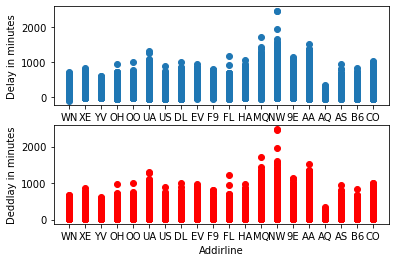

In [8]:
# Aquí las podemos ver de manera separada
plt.subplot(2, 1, 1)
plt.scatter(data_base_1_clean['UniqueCarrier'], data_base_1_clean['ArrDelay'],)
plt.xlabel('Airline')
plt.ylabel('Delay in minutes')

plt.subplot(2, 1, 2)
plt.scatter(data_base_1_clean['UniqueCarrier'], data_base_1_clean['DepDelay'], color='r')
plt.xlabel('Addirline')
plt.ylabel('Deddlay in minutes')
plt.show()

<AxesSubplot:xlabel='ArrDelay', ylabel='DepDelay'>

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


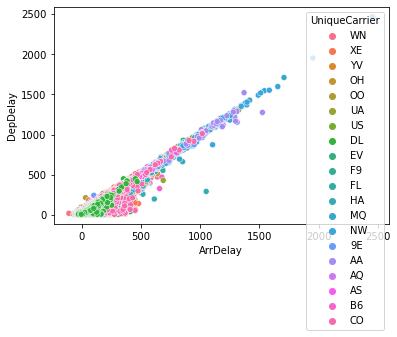

In [9]:
sns.scatterplot(x=data_base_1_clean['ArrDelay'], y=data_base_1_clean['DepDelay'], hue=data_base_1_clean['UniqueCarrier'])

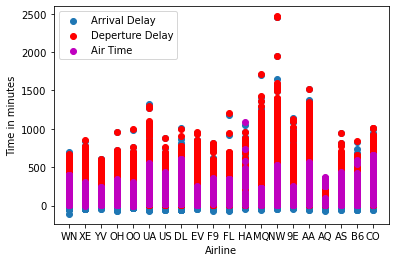

In [10]:
# Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).
plt.scatter(data_base_1_clean['UniqueCarrier'], data_base_1_clean['ArrDelay'],label='Arrival Delay')
plt.scatter(data_base_1_clean['UniqueCarrier'], data_base_1_clean['DepDelay'], c='r',label='Deperture Delay')
plt.scatter(data_base_1_clean['UniqueCarrier'], data_base_1_clean['AirTime'], c='m',label='Air Time')
plt.xlabel('Airline')
plt.ylabel('Time in minutes')
plt.legend()
plt.savefig('ArrDepAir_Time_Airlines.png')
plt.show()


### Exercici 3
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

Text(0.5, 1.0, 'Deperture Delay of each Airline')

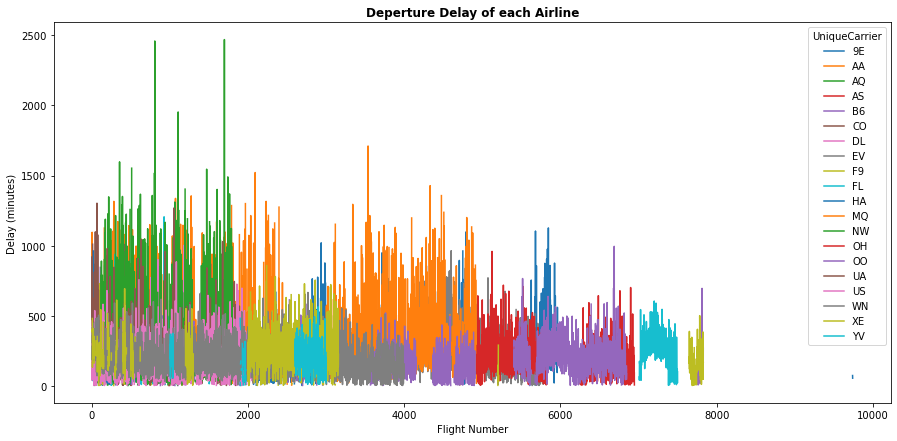

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
data_base_1_clean.groupby(['FlightNum','UniqueCarrier']).max()['DepDelay'].unstack().plot(ax=ax)
ax.set_xlabel('Flight Number')
ax.set_ylabel('Delay (minutes)')
plt.title('Deperture Delay of each Airline', fontweight='bold')


Text(0.5, 1.0, 'Maximal Deperture Delay of each Airline')

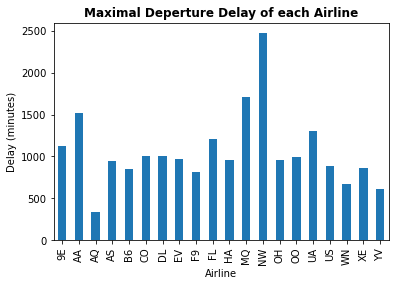

In [12]:
data_base_1_clean.groupby('UniqueCarrier')['DepDelay'].max().plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Delay (minutes)')
plt.title('Maximal Deperture Delay of each Airline', fontweight='bold')

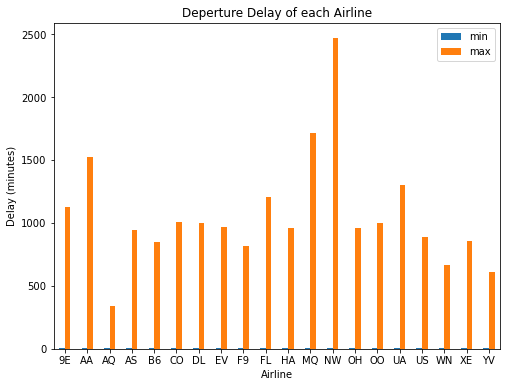

In [13]:
dfg = data_base_1_clean.groupby('UniqueCarrier').DepDelay.agg(['min', 'max'])

# plot the grouped bar
ax = dfg.plot(kind='bar', figsize=(8, 6), title='Deperture Delay of each Airline', xlabel='Airline', ylabel='Delay (minutes)', rot=0)
plt.show()

Text(0.5, 1.0, 'Deperture Delay of each Flight')

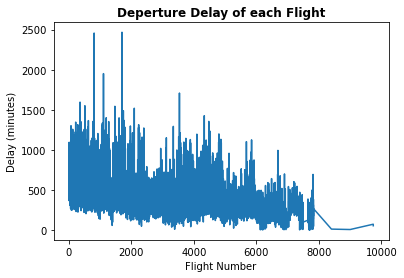

In [14]:
data_base_1_clean.groupby('FlightNum')['DepDelay'].max().plot()
plt.xlabel('Flight Number')
plt.ylabel('Delay (minutes)')
plt.title('Deperture Delay of each Flight', fontweight='bold')

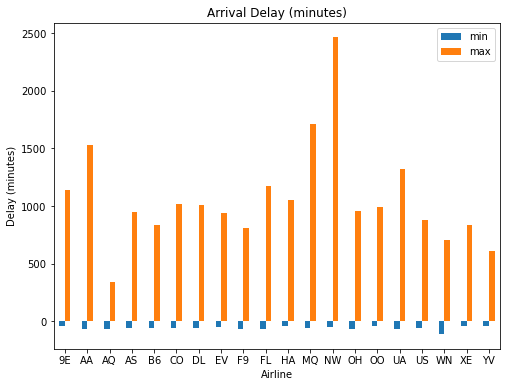

In [15]:
dfgg = data_base_1_clean.groupby('UniqueCarrier').ArrDelay.agg(['min', 'max'])

# plot the grouped bar
ax = dfgg.plot(kind='bar', figsize=(8, 6), title='Arrival Delay (minutes)', xlabel='Airline', ylabel='Delay (minutes)', rot=0)
plt.show()

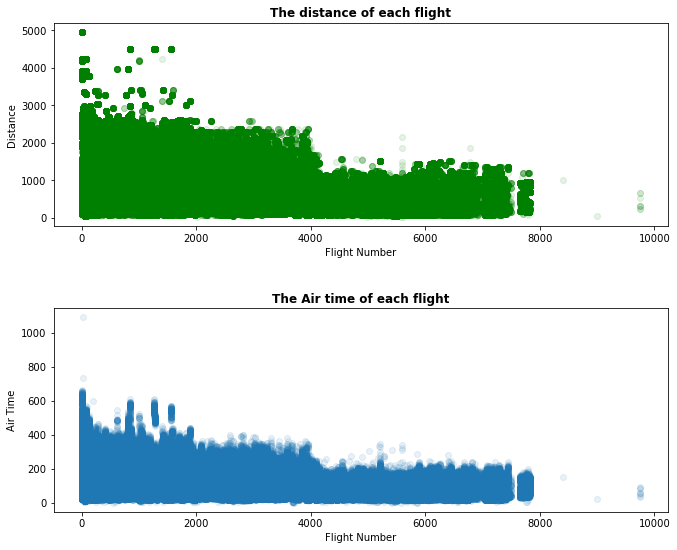

In [16]:
plt.figure(figsize=[11, 9])
plt.subplot(2, 1, 1)
plt.scatter(data_base_1_clean['FlightNum'], data_base_1_clean['Distance'], color='g', alpha=0.1)
plt.xlabel('Flight Number')
plt.ylabel('Distance')
plt.title("The distance of each flight", fontweight='bold')

plt.subplot(2, 1, 2)
plt.scatter(data_base_1_clean['FlightNum'], data_base_1_clean['AirTime'], alpha=0.1)
plt.xlabel('Flight Number')
plt.ylabel('Air Time')
plt.title("The Air time of each flight", fontweight='bold')

plt.subplots_adjust(hspace=0.4)

plt.show()

In [17]:
# Velocidad media del vuelo
data_base_3=data_base_1_clean.copy()
data_base_3 = data_base_3[data_base_3['AirTime'] != 0]
data_base_3=data_base_3.assign(AverageVelocity=lambda x: x.Distance /(x.AirTime))

# ¿Vuelo retrasado?
data_base_3=data_base_3.assign(DelayedFlight=np.where(data_base_3['ArrDelay']>0, 1, 0))
data_base_4=data_base_3[['AverageVelocity','DelayedFlight']].copy()

Text(0.5, 1.0, 'Average Velocity of each Flight')

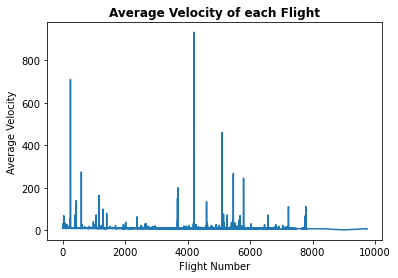

In [18]:
data_base_3.groupby('FlightNum')['AverageVelocity'].max().plot()
plt.xlabel('Flight Number')
plt.ylabel('Average Velocity')
plt.title('Average Velocity of each Flight', fontweight='bold')

Text(0.5, 1.0, 'Delayed flights of each Airline')

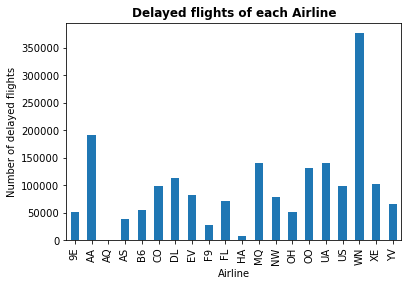

In [19]:
#Aerolinínies amb més enderreriments acumulats 
#data_base_3.groupby('UniqueCarrier')['DelayedFlight'].size().plot()

data_base_3.groupby('UniqueCarrier')['DelayedFlight'].size().plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Number of delayed flights')
plt.title('Delayed flights of each Airline', fontweight='bold')